In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

In [2]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5)
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [3]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

In [4]:
maxiter = 20000

# EPS: 0.1

# LINEAR

Training first model ... 


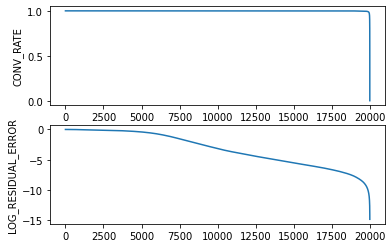

Fit time: 492.9465260505676, #SV: 1213
SUM OF eps-LOSS: 22080.301886264857
DEVSET MEE: 3.478324829813461


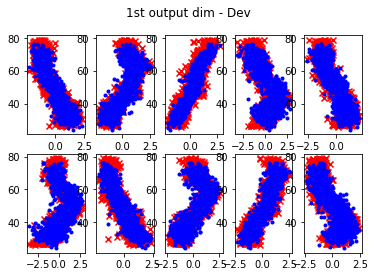

Testing the model
SUM OF eps-LOSS: 5737.60839282728
TEST MEE: 3.592789191027164


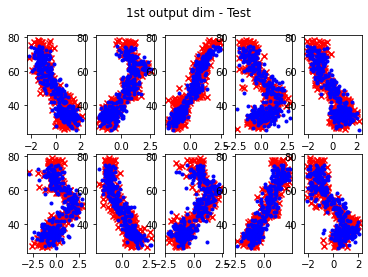

In [5]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


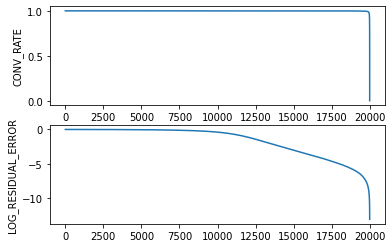

Fit time: 546.7515971660614, #SV: 1219
SUM OF eps-LOSS: 22035.542464856804
DEVSET MEE: 3.4613006510433224


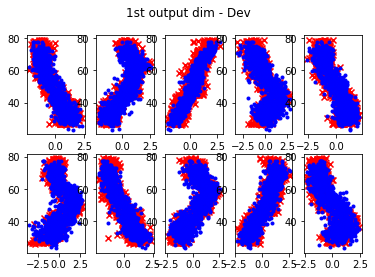

Testing the model
SUM OF eps-LOSS: 5788.695284510368
TEST MEE: 3.5608538492375885


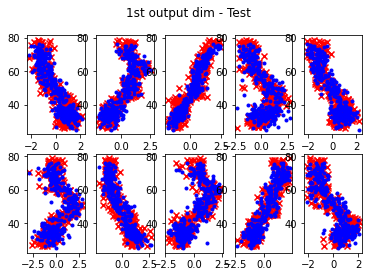

In [6]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


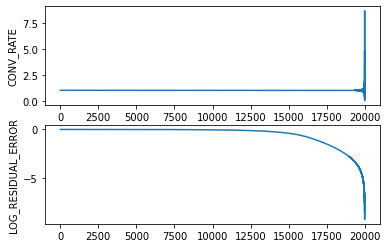

Fit time: 570.564640045166, #SV: 1220
SUM OF eps-LOSS: 5525416.488202203
DEVSET MEE: 63.117400175248825


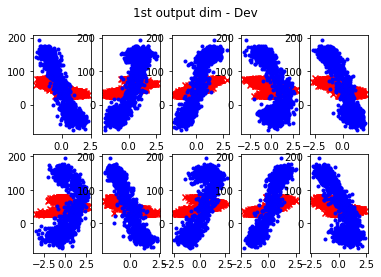

Testing the model
SUM OF eps-LOSS: 1334891.9253317304
TEST MEE: 61.48768516426156


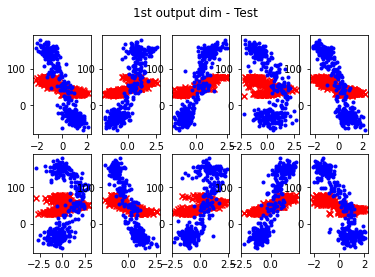

In [7]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [8]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

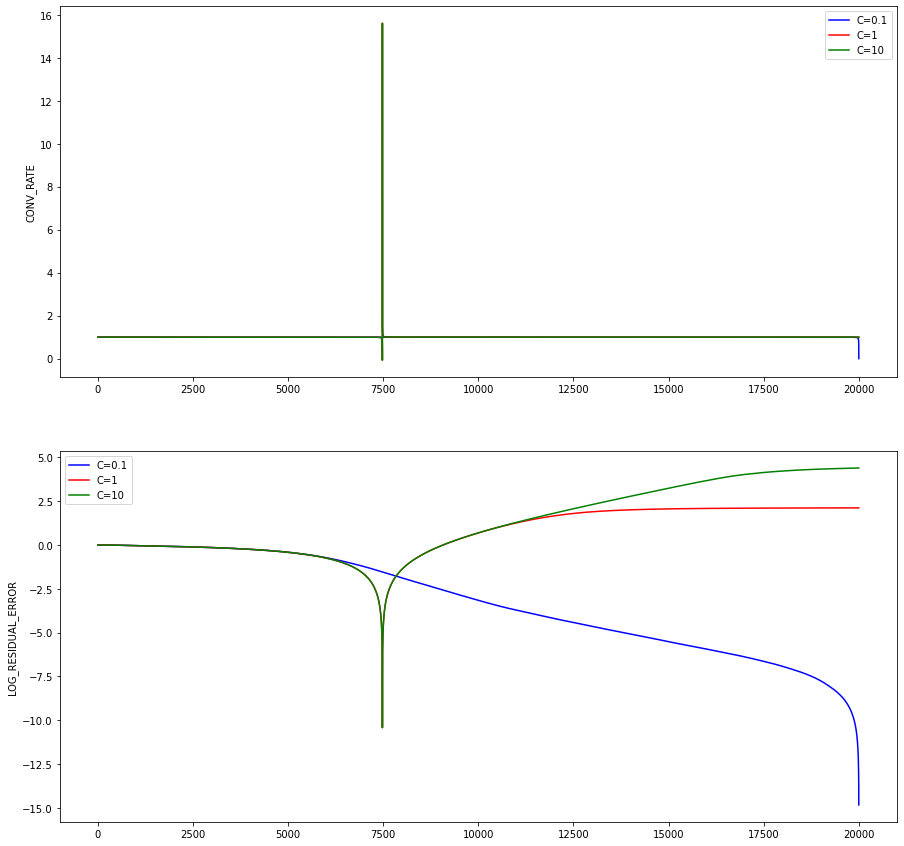

In [9]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_01_0, lin_01_1, lin_01_2 = cup_model, cup_model, cup_model2


In [10]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-439.30443668955115,
 -4096.436426205386,
 -36017.41286056553,
 array([  0.9115951 ,   0.91086512, -18.87919423]))

# POLY

Training first model ... 


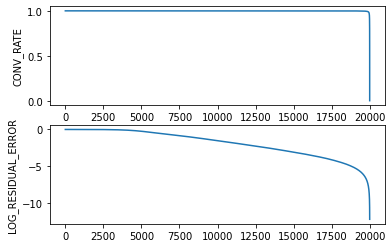

Fit time: 548.1745703220367, #SV: 1216
SUM OF eps-LOSS: 27397.915541945462
DEVSET MEE: 3.4743831804193097


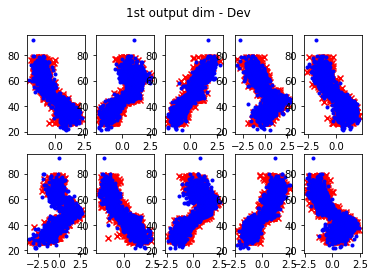

Testing the model
SUM OF eps-LOSS: 6352.7278784208165
TEST MEE: 3.397439547170913


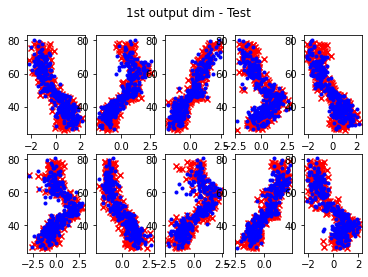

In [11]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


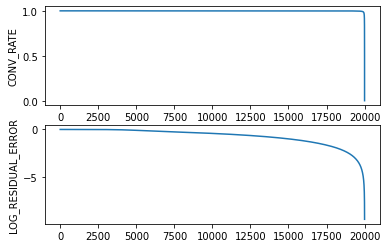

Fit time: 567.2384934425354, #SV: 1218
SUM OF eps-LOSS: 15647.647501600162
DEVSET MEE: 2.620620974693959


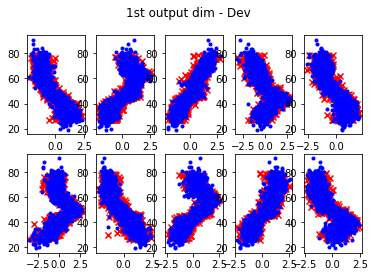

Testing the model
SUM OF eps-LOSS: 3749.2790351684152
TEST MEE: 2.6139201539382175


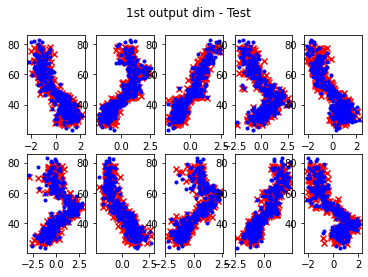

In [12]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


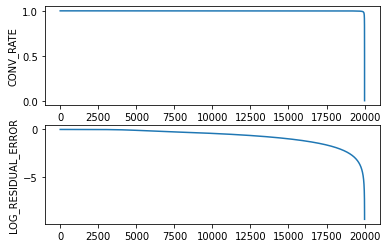

Fit time: 550.4336016178131, #SV: 1218
SUM OF eps-LOSS: 15529.079546881509
DEVSET MEE: 2.6123662738232514


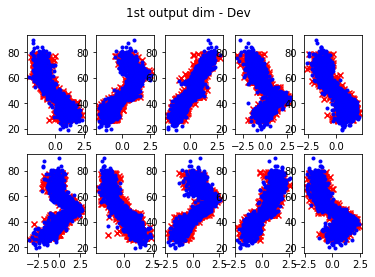

Testing the model
SUM OF eps-LOSS: 3705.4209620857455
TEST MEE: 2.6015288518334185


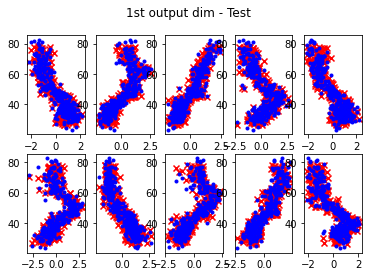

In [13]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [14]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

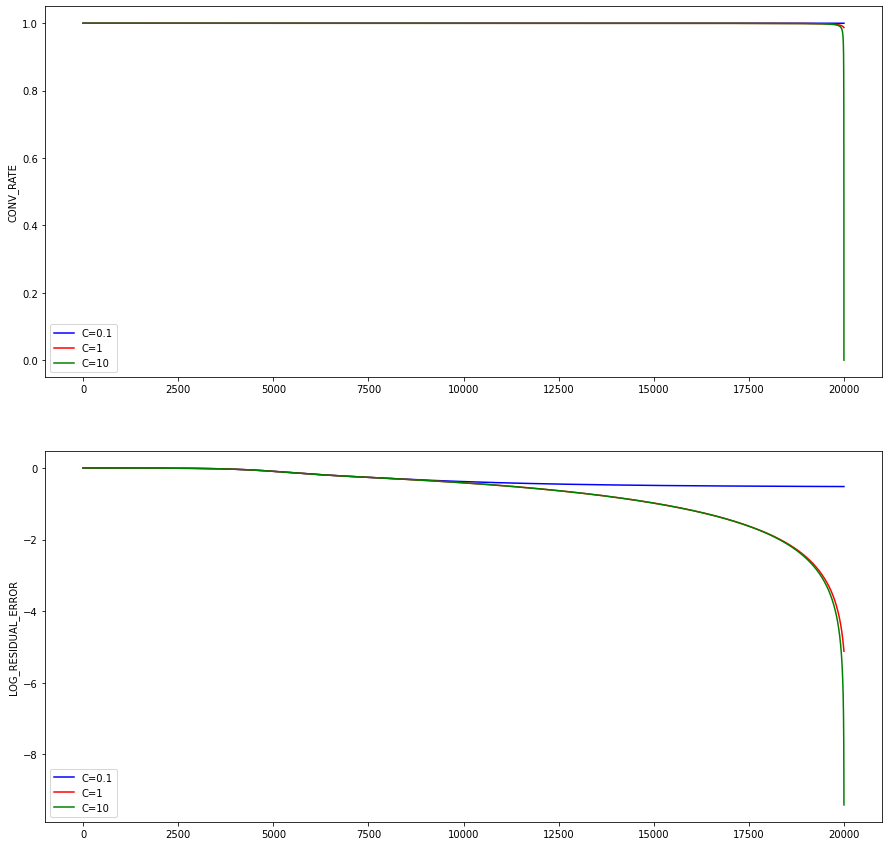

In [15]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_01_0, poly_01_1, poly_01_2 = cup_model, cup_model, cup_model2

In [16]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-599.9415247360289,
 -1476.25583668902,
 -1485.0351647976713,
 array([0.90263665, 0.94200623, 0.94266853]))

# SIGMOID

Training first model ... 


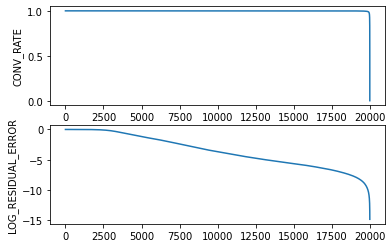

Fit time: 505.3580002784729, #SV: 1212
SUM OF eps-LOSS: 42358.347977886726
DEVSET MEE: 4.603621780468842


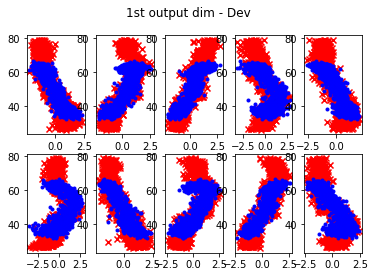

Testing the model
SUM OF eps-LOSS: 10298.236490041854
TEST MEE: 4.633965704505014


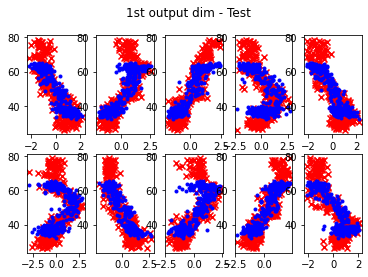

In [17]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


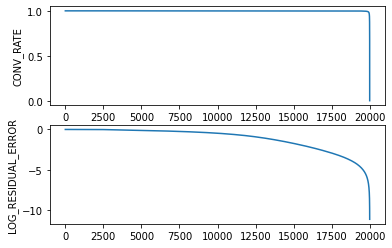

Fit time: 555.2660171985626, #SV: 1220
SUM OF eps-LOSS: 25460.14698892203
DEVSET MEE: 3.735628727770127


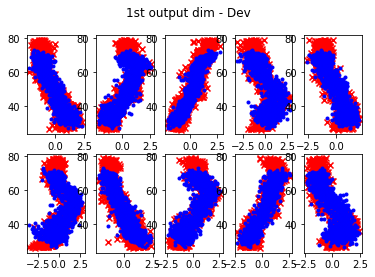

Testing the model
SUM OF eps-LOSS: 6350.922409265186
TEST MEE: 3.778013950817139


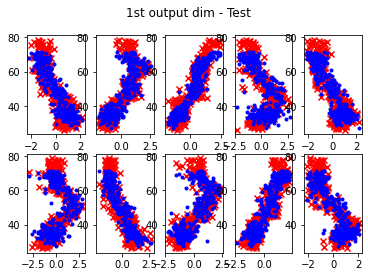

In [18]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


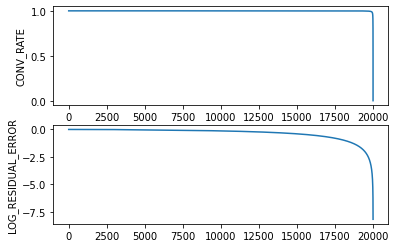

Fit time: 537.3889997005463, #SV: 1220
SUM OF eps-LOSS: 32909.225571387404
DEVSET MEE: 4.209264598685219


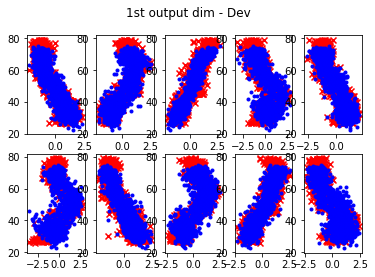

Testing the model
SUM OF eps-LOSS: 7899.289555382168
TEST MEE: 4.239456486027881


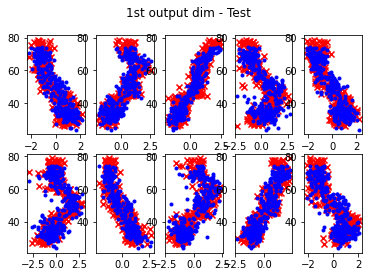

In [19]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [20]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

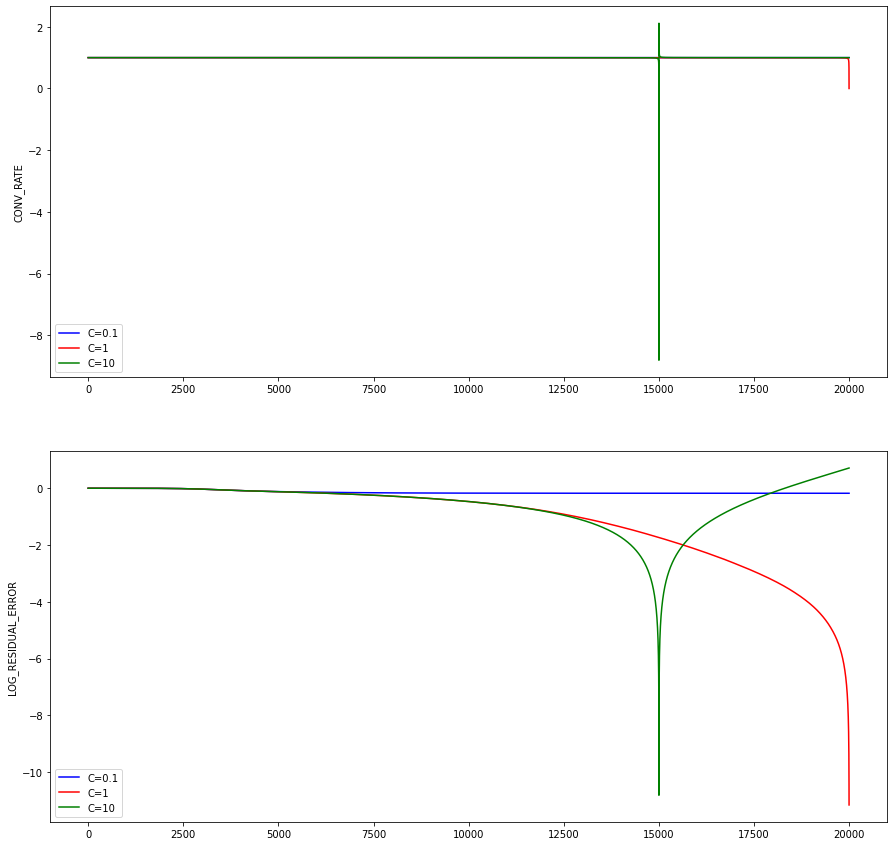

In [21]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_01_0, sig_01_1, sig_01_2 = cup_model, cup_model, cup_model2

In [22]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-749.7711683133801,
 -4615.659672208186,
 -14024.680474806026,
 array([0.84292762, 0.90231981, 0.87890926]))

# RBF

Training first model ... 


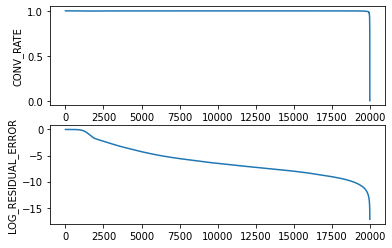

Fit time: 472.0080027580261, #SV: 1213
SUM OF eps-LOSS: 28389.07024179777
DEVSET MEE: 3.5627360658423677


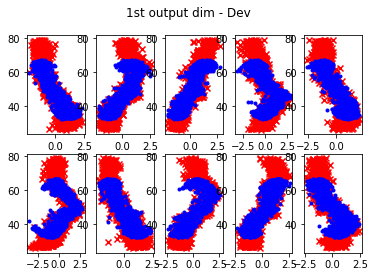

Testing the model
SUM OF eps-LOSS: 6704.478169948627
TEST MEE: 3.479327399182029


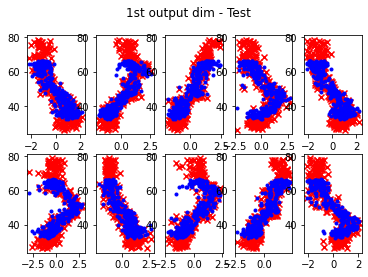

In [23]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


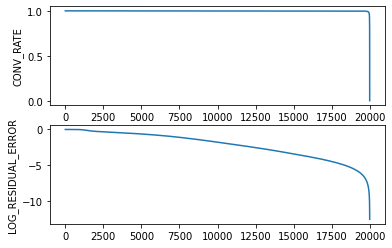

Fit time: 547.9200005531311, #SV: 1217
SUM OF eps-LOSS: 6812.463604757325
DEVSET MEE: 1.8367759760888367


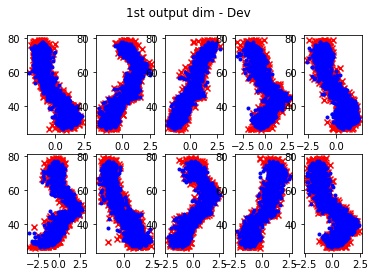

Testing the model
SUM OF eps-LOSS: 1903.9374577450978
TEST MEE: 1.9370305839661905


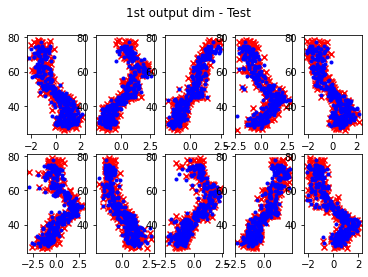

In [24]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


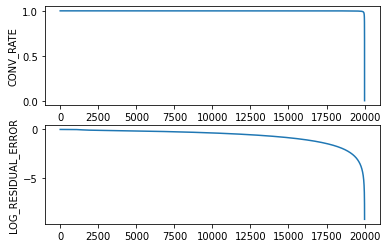

Fit time: 544.5139992237091, #SV: 1220
SUM OF eps-LOSS: 4909.954698928838
DEVSET MEE: 1.6037323604417741


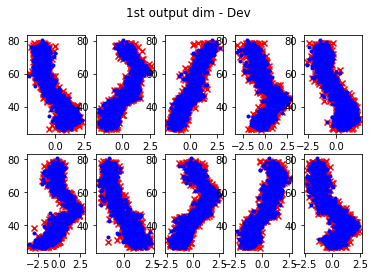

Testing the model
SUM OF eps-LOSS: 1670.012778635214
TEST MEE: 1.8160117993332272


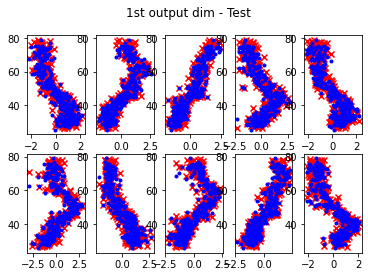

In [25]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [26]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

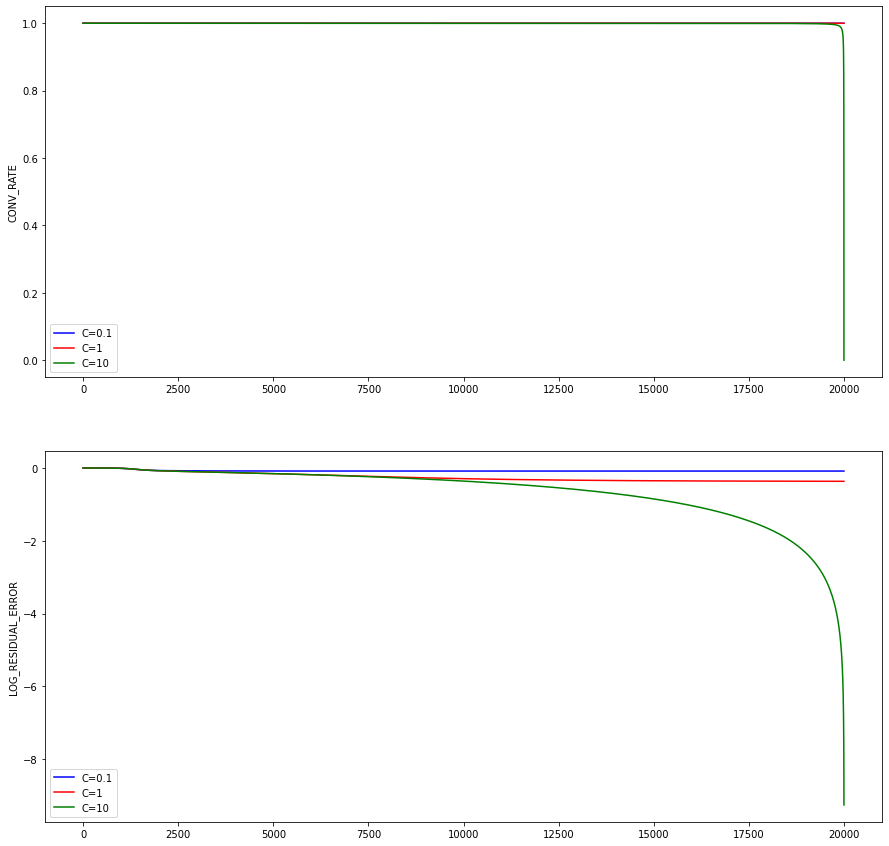

In [27]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_01_0, rbf_01_1, rbf_01_2 = cup_model, cup_model, cup_model2

In [28]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-761.0829325205018,
 -2899.014915999022,
 -9476.197460690077,
 array([0.89733877, 0.9700211 , 0.97360441]))

# EPS: 0.5

# LINEAR

Training first model ... 


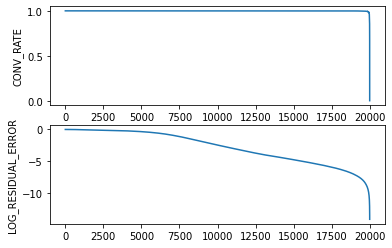

Fit time: 502.0673005580902, #SV: 1205
SUM OF eps-LOSS: 22107.38283054162
DEVSET MEE: 3.4820947298932463


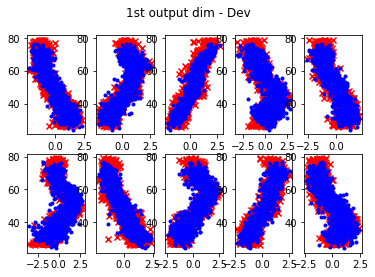

Testing the model
SUM OF eps-LOSS: 5752.548259704888
TEST MEE: 3.597216301894244


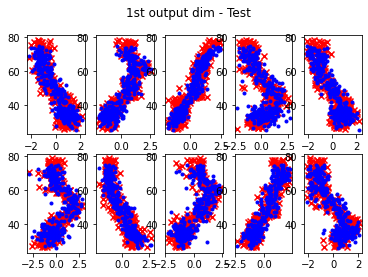

In [29]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


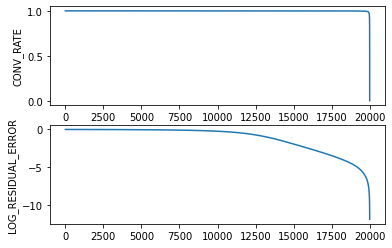

Fit time: 569.064136505127, #SV: 1218
SUM OF eps-LOSS: 22022.214227656605
DEVSET MEE: 3.4638096541803334


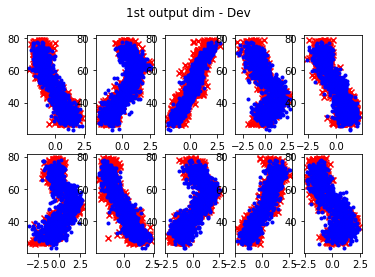

Testing the model
SUM OF eps-LOSS: 5758.080947696768
TEST MEE: 3.5609728935544585


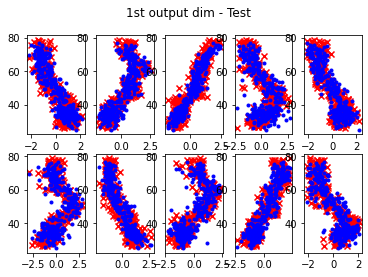

In [30]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


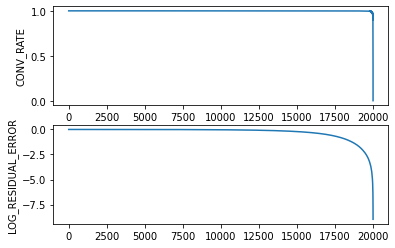

Fit time: 592.3502922058105, #SV: 1220
SUM OF eps-LOSS: 1582250.5971794296
DEVSET MEE: 33.76868603772957


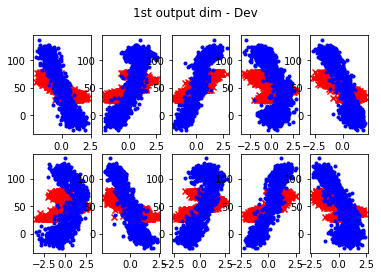

Testing the model
SUM OF eps-LOSS: 383889.18967883027
TEST MEE: 33.0243253552234


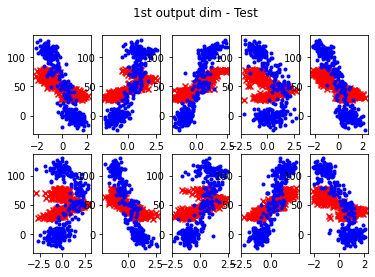

In [31]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [32]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

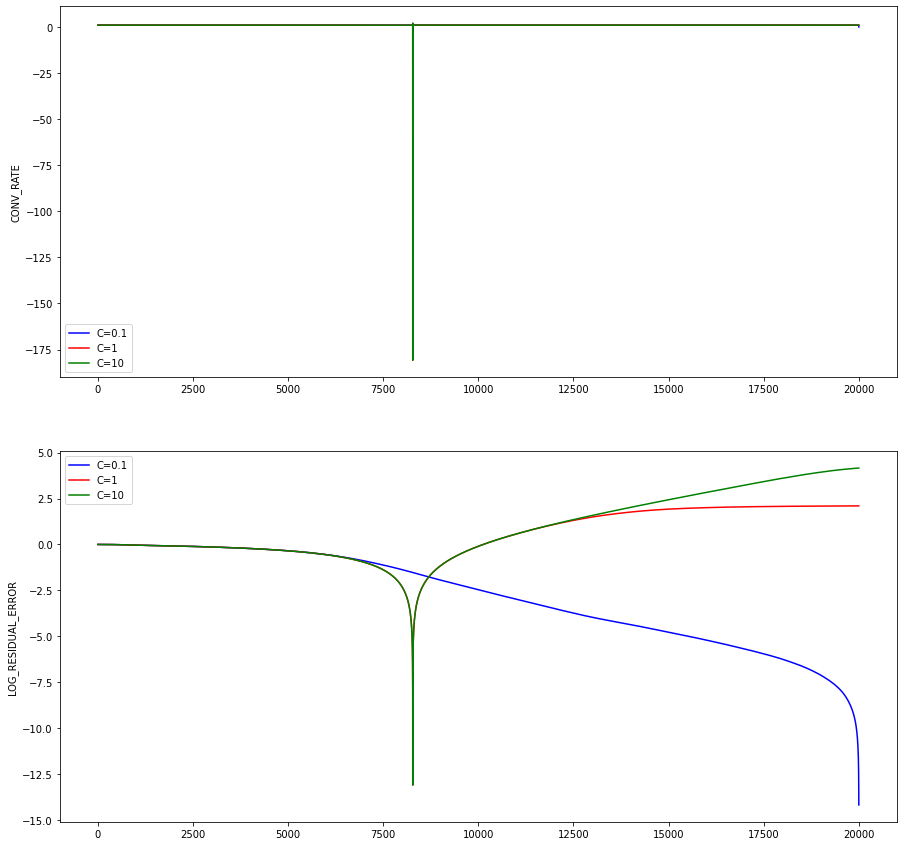

In [33]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_05_0, lin_05_1, lin_05_2 = cup_model, cup_model, cup_model2


In [34]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-392.57533320351604,
 -3594.0022354233292,
 -25551.54220184693,
 array([ 0.91136921,  0.91131989, -4.73069303]))

# POLY

Training first model ... 


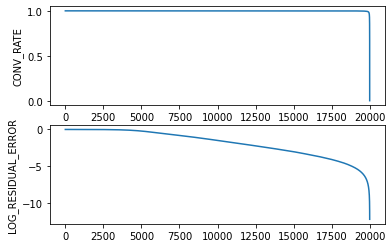

Fit time: 564.6178722381592, #SV: 1160
SUM OF eps-LOSS: 27685.596001764214
DEVSET MEE: 3.507423274921181


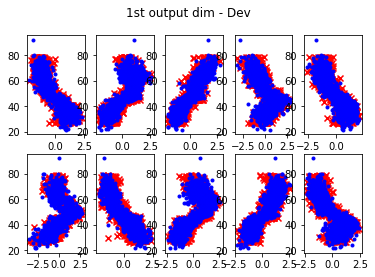

Testing the model
SUM OF eps-LOSS: 6437.089637306173
TEST MEE: 3.426505319919391


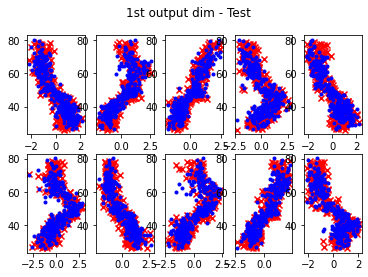

In [35]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


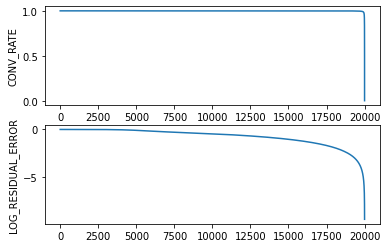

Fit time: 572.7179362773895, #SV: 1194
SUM OF eps-LOSS: 17108.16035611809
DEVSET MEE: 2.7374657039777595


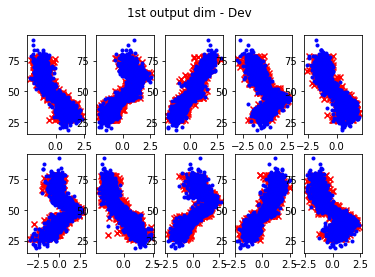

Testing the model
SUM OF eps-LOSS: 4047.9899420571087
TEST MEE: 2.724827904719124


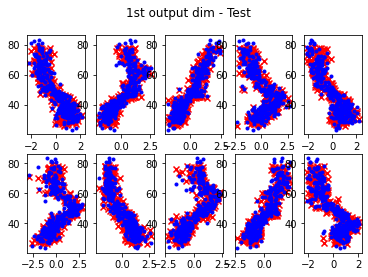

In [36]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


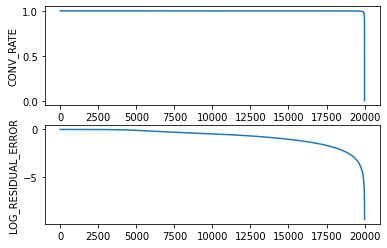

Fit time: 547.98401927948, #SV: 1196
SUM OF eps-LOSS: 17054.30272671171
DEVSET MEE: 2.7362522901547384


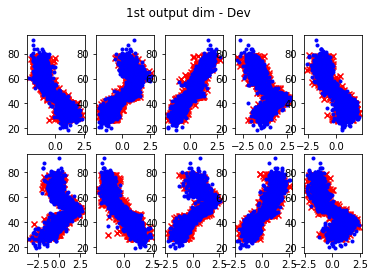

Testing the model
SUM OF eps-LOSS: 4024.4154317881375
TEST MEE: 2.719052822497695


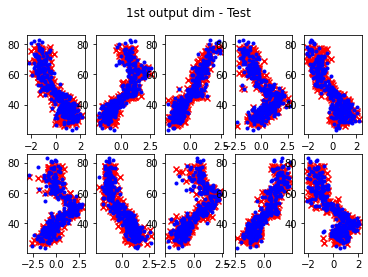

In [37]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [38]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

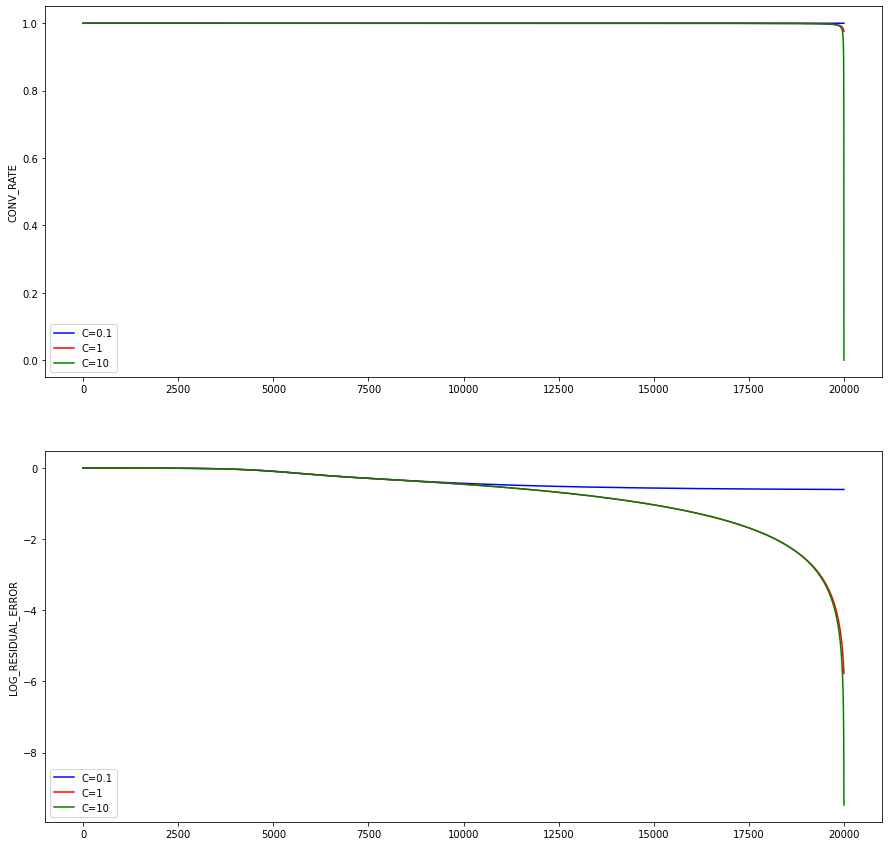

In [39]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_05_0, poly_05_1, poly_05_2 = cup_model, cup_model, cup_model2

In [40]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-556.1494262395397,
 -1223.2932935704403,
 -1227.0076914920935,
 array([0.90135731, 0.93746973, 0.93782518]))

# SIGMOID

Training first model ... 


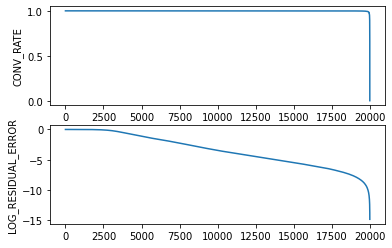

Fit time: 504.8299992084503, #SV: 1195
SUM OF eps-LOSS: 42305.936020756235
DEVSET MEE: 4.60495178096031


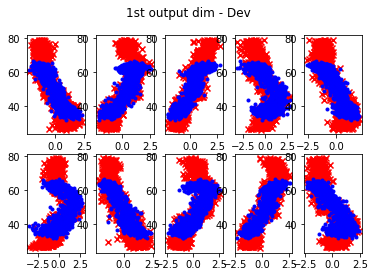

Testing the model
SUM OF eps-LOSS: 10289.386780334245
TEST MEE: 4.6358093250595855


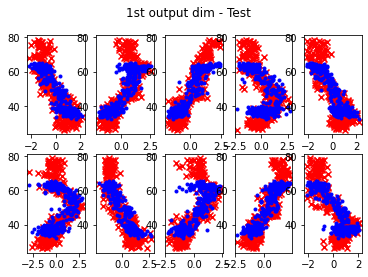

In [41]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


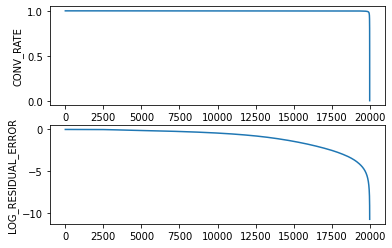

Fit time: 628.9657278060913, #SV: 1216
SUM OF eps-LOSS: 25003.35788513552
DEVSET MEE: 3.7084205484996406


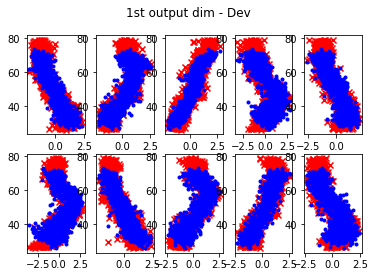

Testing the model
SUM OF eps-LOSS: 6241.835881017992
TEST MEE: 3.7454741175835373


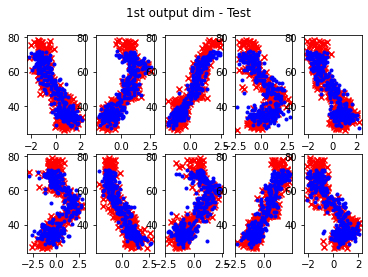

In [42]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


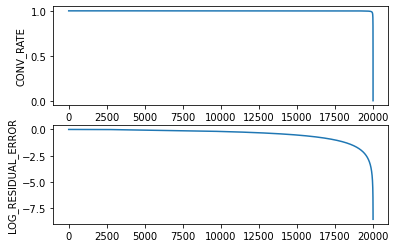

Fit time: 592.200347661972, #SV: 1218
SUM OF eps-LOSS: 27028.218463636094
DEVSET MEE: 3.849460009030389


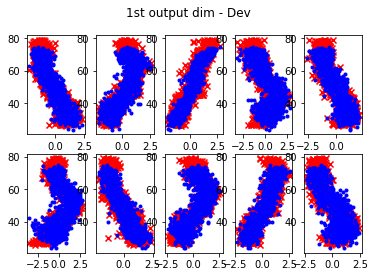

Testing the model
SUM OF eps-LOSS: 6690.829645284891
TEST MEE: 3.8933255442493824


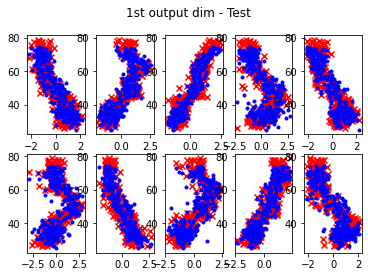

In [43]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [44]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

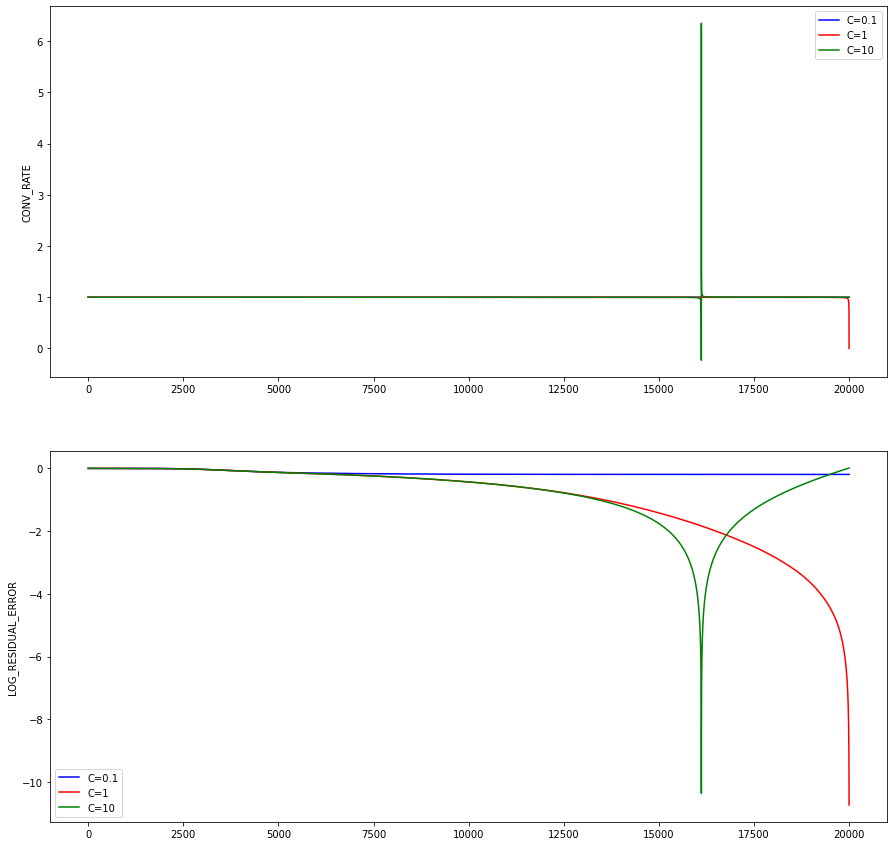

In [45]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_05_0, sig_05_1, sig_05_2 = cup_model, cup_model, cup_model2

In [46]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-703.0707523849082,
 -4024.078717109094,
 -8100.11777283263,
 array([0.84305733, 0.90396906, 0.89716794]))

# RBF

Training first model ... 


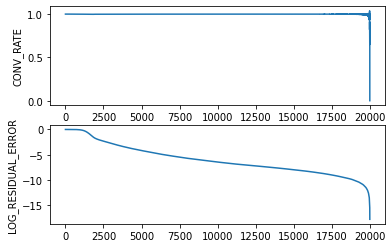

Fit time: 537.4694964885712, #SV: 1199
SUM OF eps-LOSS: 28820.023250053997
DEVSET MEE: 3.593744529437346


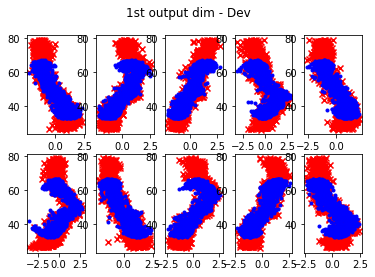

Testing the model
SUM OF eps-LOSS: 6820.514625368564
TEST MEE: 3.5119520866983045


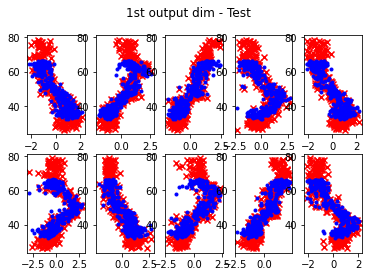

In [47]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


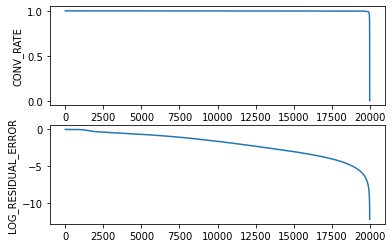

Fit time: 611.1739718914032, #SV: 1208
SUM OF eps-LOSS: 6922.892481070165
DEVSET MEE: 1.8632004355218796


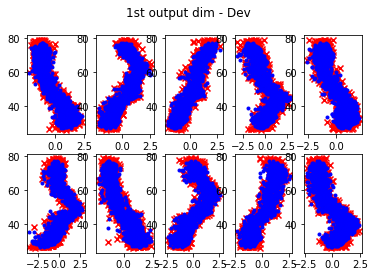

Testing the model
SUM OF eps-LOSS: 1928.5589568854537
TEST MEE: 1.9498498027476976


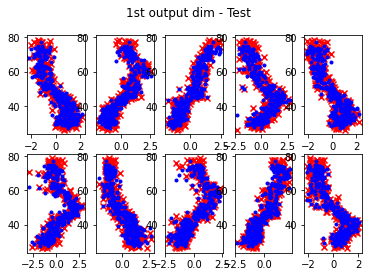

In [48]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


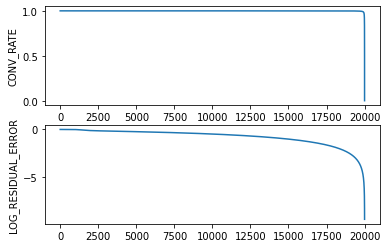

Fit time: 608.2530701160431, #SV: 1217
SUM OF eps-LOSS: 5354.821763144093
DEVSET MEE: 1.6888867258227946


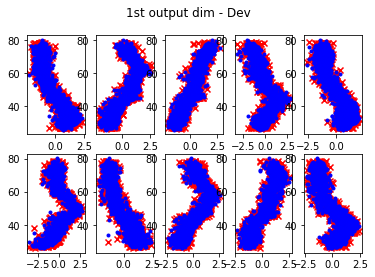

Testing the model
SUM OF eps-LOSS: 1729.65216039539
TEST MEE: 1.8637890594135522


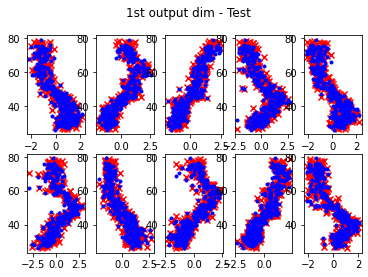

In [49]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [50]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

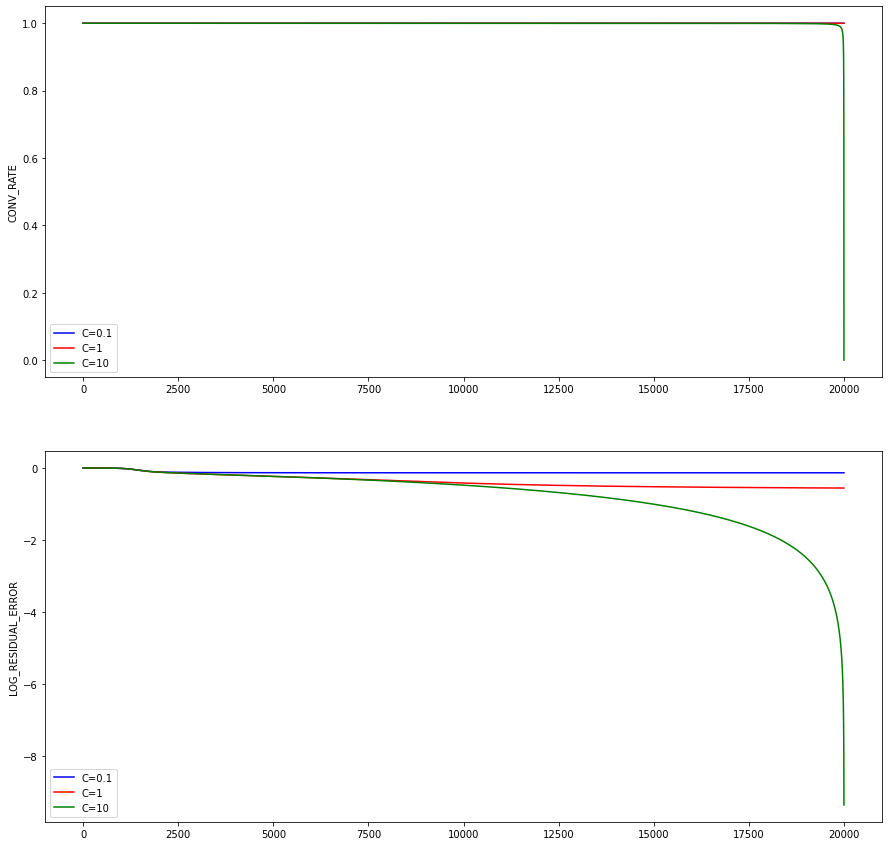

In [51]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_05_0, rbf_05_1, rbf_05_2 = cup_model, cup_model, cup_model2

In [52]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-716.1628047222255,
 -2454.122762483774,
 -5752.754192574849,
 array([0.89558614, 0.96964409, 0.97267566]))

# EPS: 1.0

# LINEAR

Training first model ... 


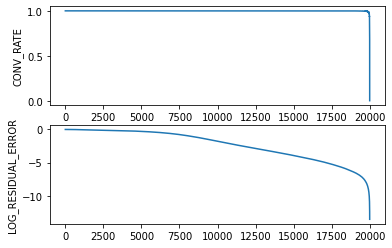

Fit time: 564.4027366638184, #SV: 1195
SUM OF eps-LOSS: 22163.0694506357
DEVSET MEE: 3.4902555221923226


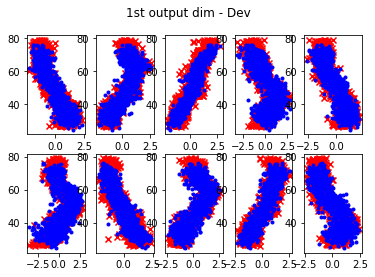

Testing the model
SUM OF eps-LOSS: 5736.32243096217
TEST MEE: 3.6005437916878846


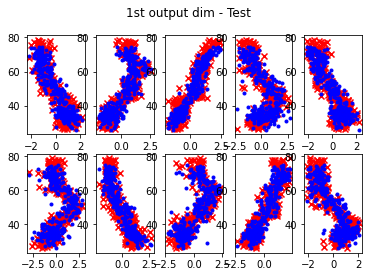

In [53]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


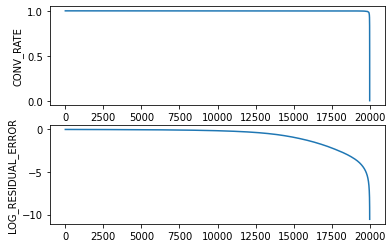

Fit time: 607.2528314590454, #SV: 1219
SUM OF eps-LOSS: 22068.48656316709
DEVSET MEE: 3.472381032735214


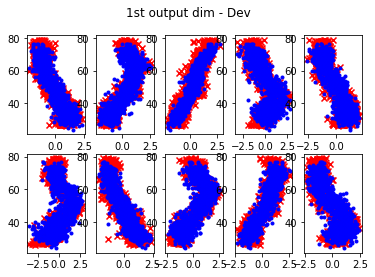

Testing the model
SUM OF eps-LOSS: 5713.184972856677
TEST MEE: 3.5562160229628565


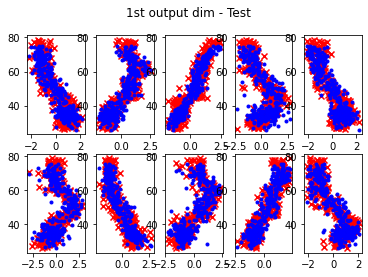

In [54]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


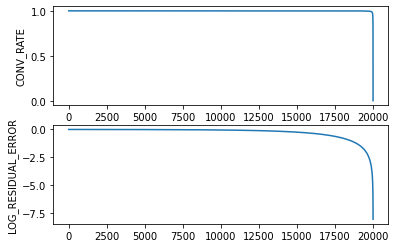

Fit time: 590.6882424354553, #SV: 1220
SUM OF eps-LOSS: 21936.463421931407
DEVSET MEE: 3.4734334836124603


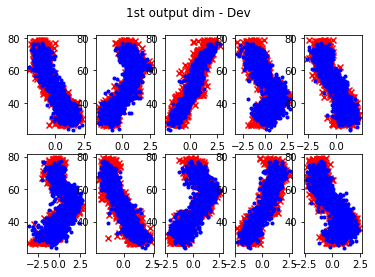

Testing the model
SUM OF eps-LOSS: 5792.670108302764
TEST MEE: 3.598017208872762


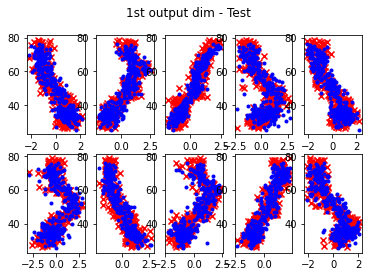

In [55]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [56]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

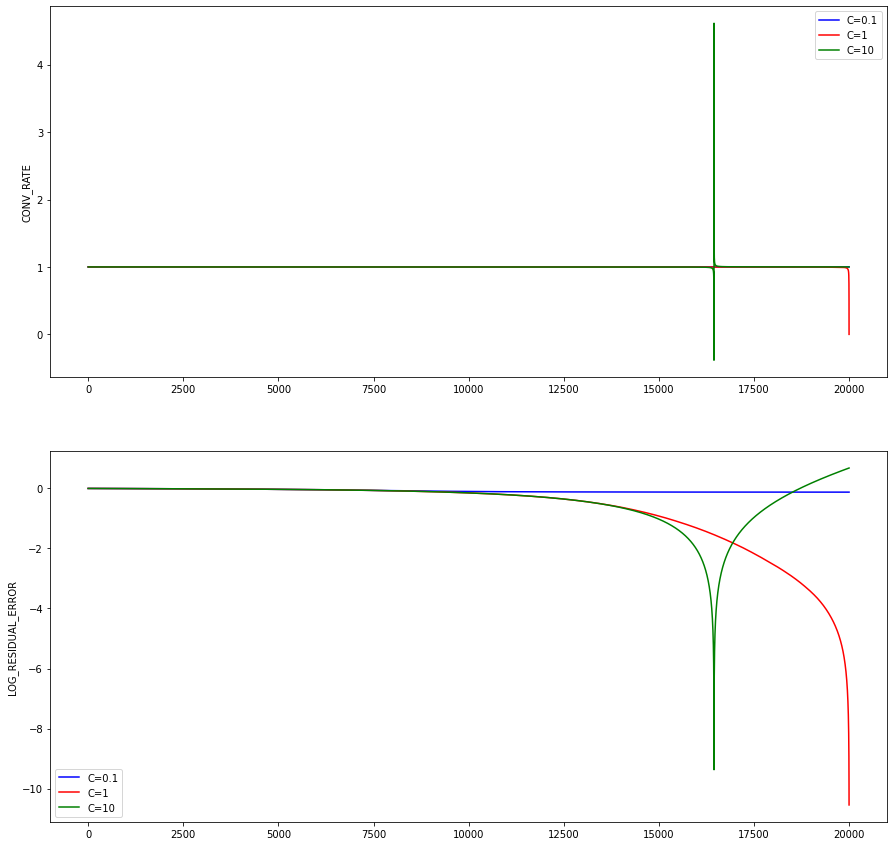

In [57]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_10_0, lin_10_1, lin_10_2 = cup_model, cup_model, cup_model2

In [58]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-337.38198961009437,
 -2915.371305281221,
 -8677.244035960799,
 array([0.91160712, 0.91199084, 0.91077266]))

# POLY

Training first model ... 


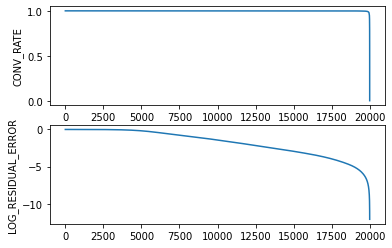

Fit time: 553.3771104812622, #SV: 1123
SUM OF eps-LOSS: 28015.09843996395
DEVSET MEE: 3.544086536921922


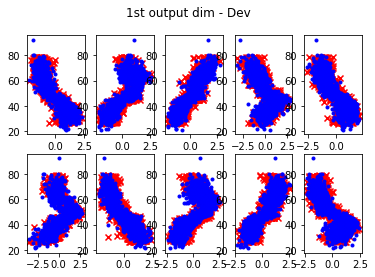

Testing the model
SUM OF eps-LOSS: 6533.362354544721
TEST MEE: 3.4599369663551953


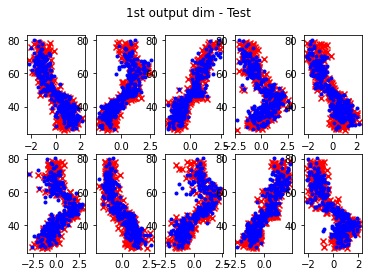

In [59]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


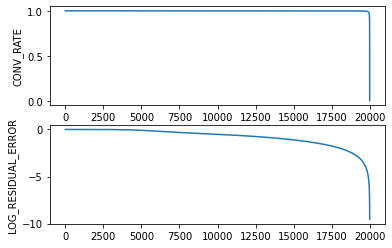

Fit time: 566.6779263019562, #SV: 1176
SUM OF eps-LOSS: 18873.5060490954
DEVSET MEE: 2.8887280657756773


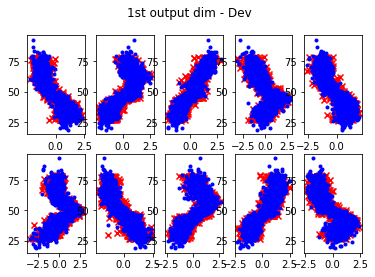

Testing the model
SUM OF eps-LOSS: 4411.713865411976
TEST MEE: 2.8675640585846964


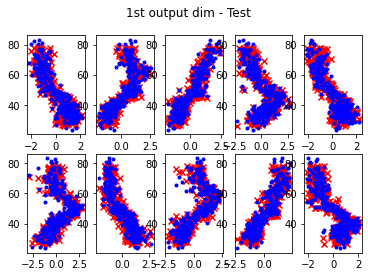

In [60]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


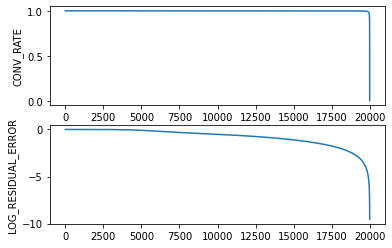

Fit time: 581.3917491436005, #SV: 1176
SUM OF eps-LOSS: 18873.506049096315
DEVSET MEE: 2.888728065775771


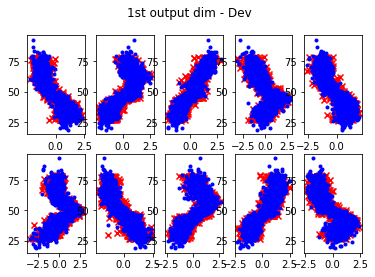

Testing the model
SUM OF eps-LOSS: 4411.713865412185
TEST MEE: 2.8675640585848


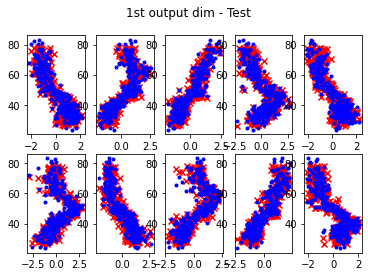

In [61]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [62]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

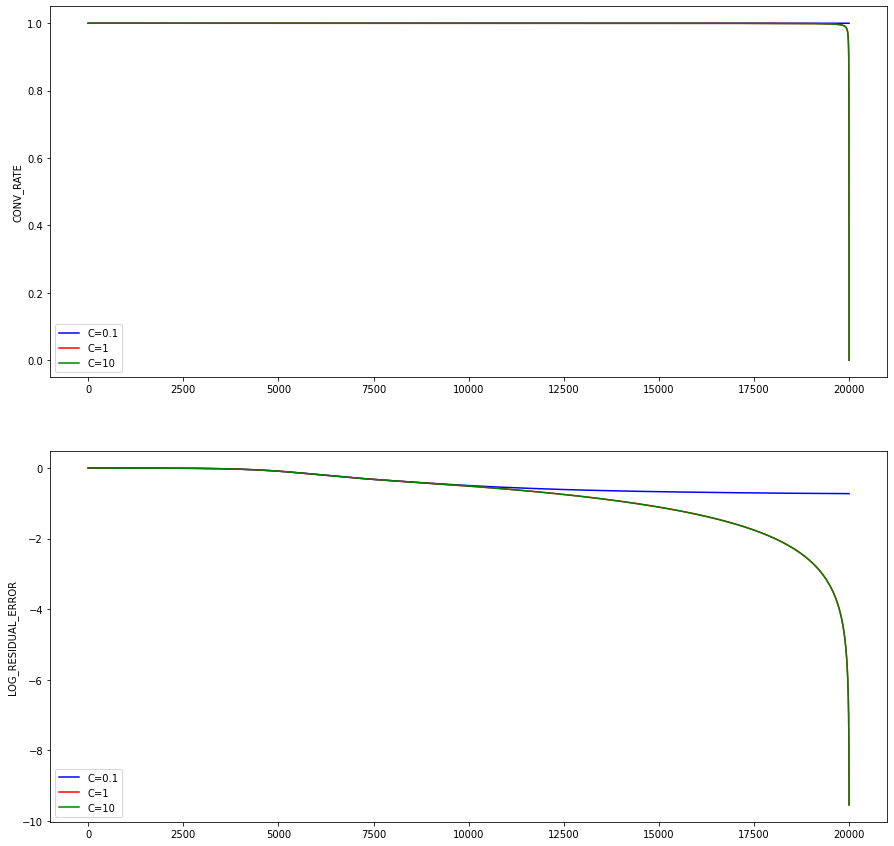

In [63]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_10_0, poly_10_1, poly_10_2 = cup_model, cup_model, cup_model2

In [64]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-507.71336594319473,
 -983.6212990160775,
 -983.6212990161118,
 array([0.89989769, 0.93193977, 0.93193977]))

# SIGMOID

Training first model ... 


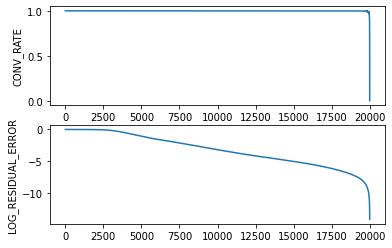

Fit time: 559.555079460144, #SV: 1184
SUM OF eps-LOSS: 41972.42814772944
DEVSET MEE: 4.596866350125271


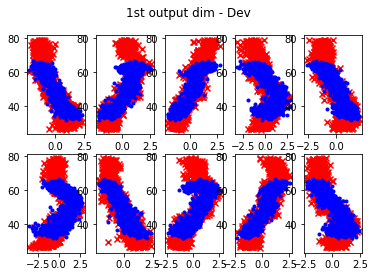

Testing the model
SUM OF eps-LOSS: 10223.654902344244
TEST MEE: 4.630500881834485


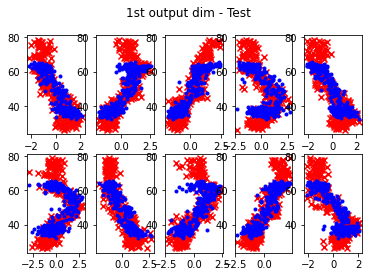

In [65]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


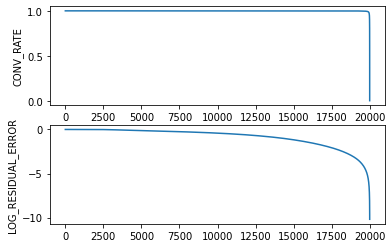

Fit time: 626.6153857707977, #SV: 1213
SUM OF eps-LOSS: 24372.671321973197
DEVSET MEE: 3.6739963189641003


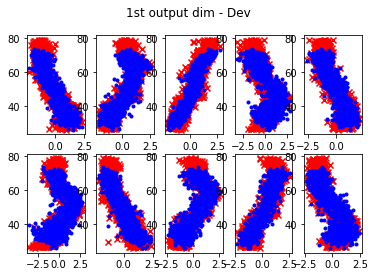

Testing the model
SUM OF eps-LOSS: 6131.674668796714
TEST MEE: 3.719464422883622


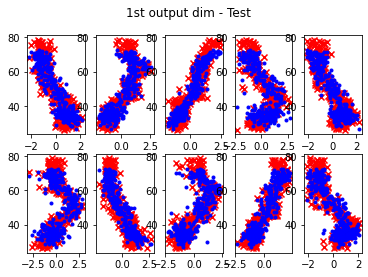

In [66]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


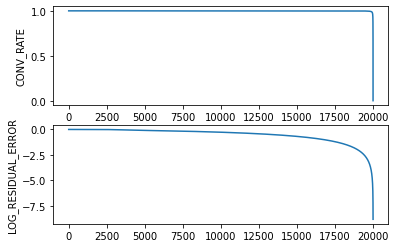

Fit time: 594.4014296531677, #SV: 1214
SUM OF eps-LOSS: 24724.45042262691
DEVSET MEE: 3.703057738127934


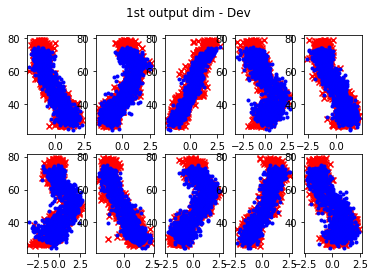

Testing the model
SUM OF eps-LOSS: 6255.05855107982
TEST MEE: 3.760419353472461


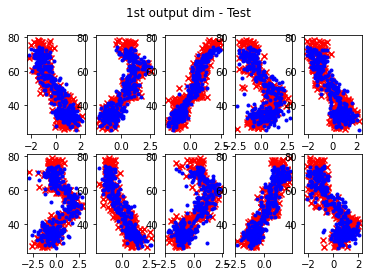

In [67]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [68]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

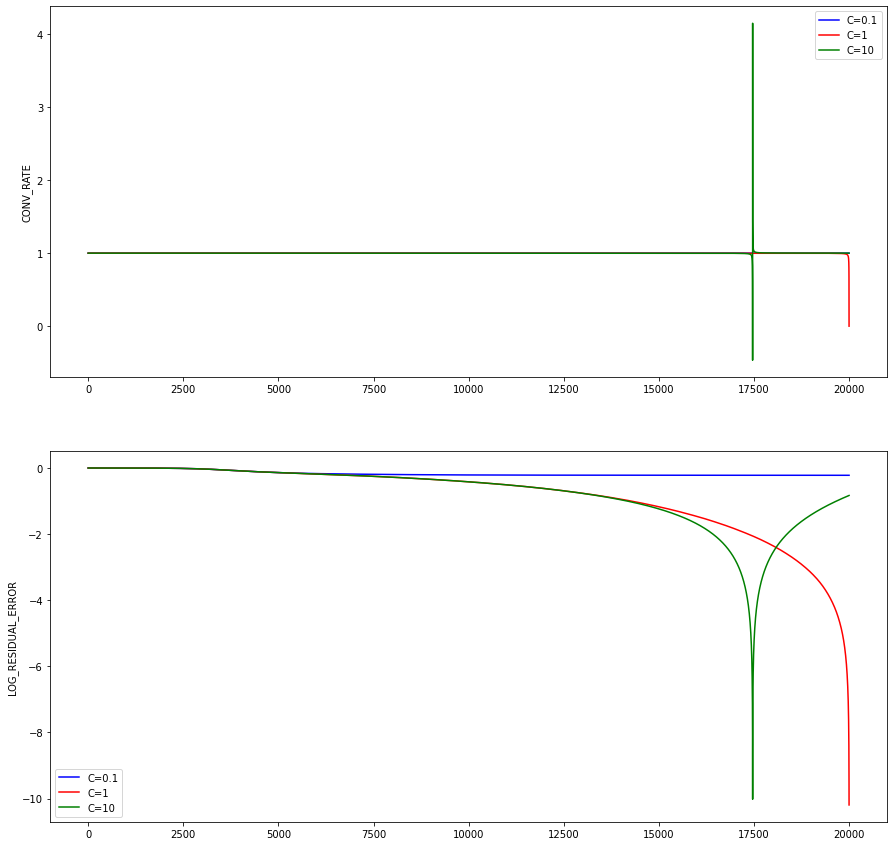

In [69]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_10_0, sig_10_1, sig_10_2 = cup_model, cup_model, cup_model2

In [70]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-648.3051852416663,
 -3279.0079679878104,
 -4708.335204962405,
 array([0.84403838, 0.90562863, 0.90375926]))

# RBF

Training first model ... 


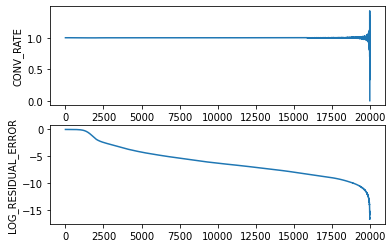

Fit time: 569.8871459960938, #SV: 1201
SUM OF eps-LOSS: 28939.999683578884
DEVSET MEE: 3.602367141871415


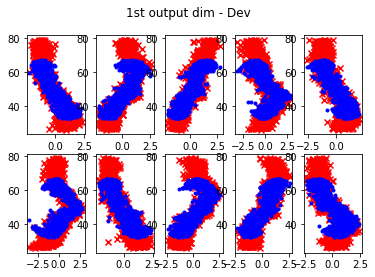

Testing the model
SUM OF eps-LOSS: 6857.229620832203
TEST MEE: 3.5221031322078766


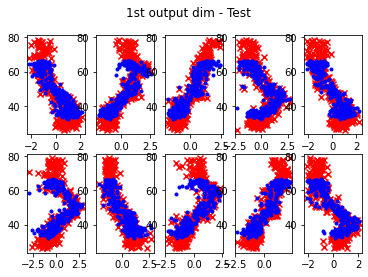

In [71]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


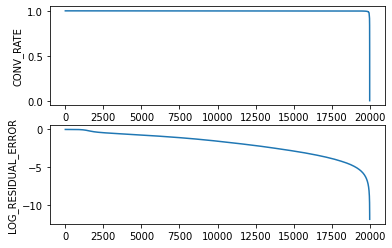

Fit time: 620.9028112888336, #SV: 1204
SUM OF eps-LOSS: 7094.686852721831
DEVSET MEE: 1.900704979574803


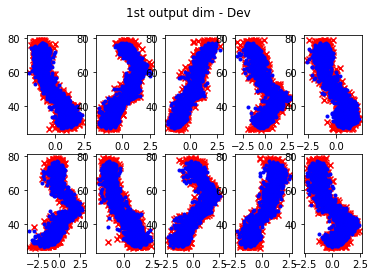

Testing the model
SUM OF eps-LOSS: 2002.170097865101
TEST MEE: 1.984890338782456


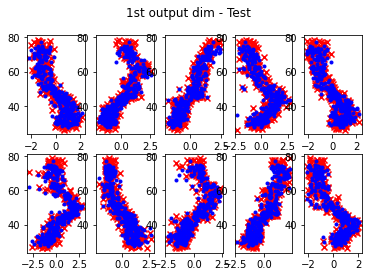

In [72]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


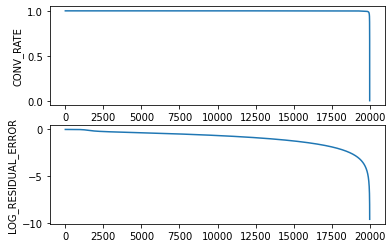

Fit time: 519.3100116252899, #SV: 1211
SUM OF eps-LOSS: 5888.839738783611
DEVSET MEE: 1.776724726451734


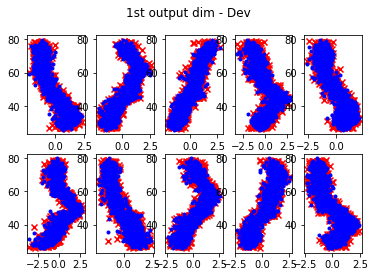

Testing the model
SUM OF eps-LOSS: 1826.1613806789996
TEST MEE: 1.922797565909458


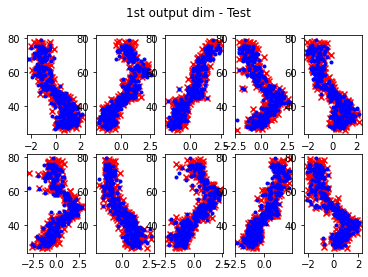

In [73]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [74]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

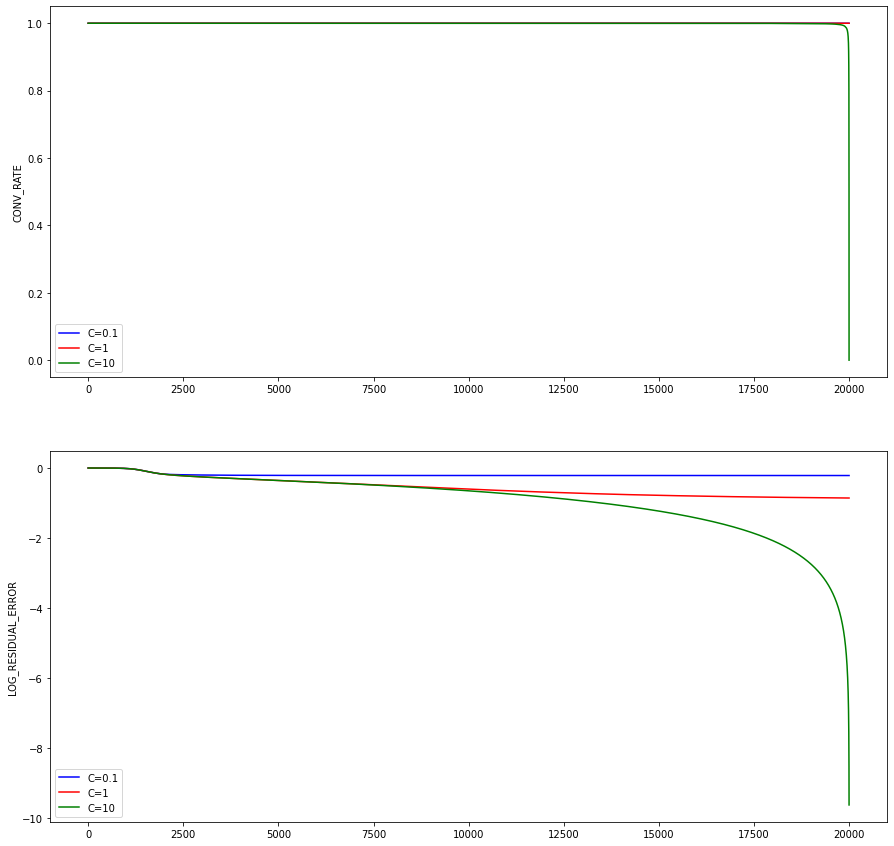

In [75]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_10_0, rbf_10_1, rbf_10_2 = cup_model, cup_model, cup_model2

In [76]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-665.8955293949382,
 -1984.1391489007203,
 -3445.0782708404204,
 array([0.89503187, 0.96851915, 0.9711891 ]))

# SAVING EVERY MODEL


In [77]:
with open("2e4_models", "wb") as f:
    pickle.dump({"lin1": lin_01_0, "lin2": lin_01_1, "lin3": lin_01_2, "lin4": lin_05_0, "lin5": lin_05_1, "lin6": lin_05_2, "lin7": lin_10_0, "lin8": lin_10_1, "lin9": lin_10_2, "poly1": poly_01_0, "poly2": poly_01_1, "poly3": poly_01_2, "poly4": poly_05_0, "poly5": poly_05_1, "poly6": poly_05_2, "poly7": poly_10_0, "poly8": poly_10_1, "poly9": poly_10_2, "sig1": sig_01_0, "sig2": sig_01_1, "sig3": sig_01_2, "sig4": sig_05_0, "sig5": sig_05_1, "sig6": sig_05_2, "sig7": sig_10_0, "sig8": sig_10_1, "sig9": sig_10_2, "rbf1": rbf_01_0, "rbf2": rbf_01_1, "rbf3": rbf_01_2, "rbf4": rbf_05_0, "rbf5": rbf_05_1, "rbf6": rbf_05_2, "rbf7": rbf_10_0, "rbf8": rbf_10_1, "rbf9": rbf_10_2}, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from sklearn.metrics import r2_score
d = {}
with open("2e4_models", "rb") as f:
    d = pickle.load(f)

In [ ]:
fig, axs = plt.subplots(8,3, figsize=(15,15))

In [ ]:
def plot_row(row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, test=test, test_out1=test_out1, fig=fig, axs=axs):
    testpred_model_0 = [float(cup_model_0.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_1 = [float(cup_model_1.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_2 = [float(cup_model_2.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_3 = [float(cup_model_3.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_4 = [float(cup_model_4.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_5 = [float(cup_model_5.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_6 = [float(cup_model_6.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_7 = [float(cup_model_7.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_8 = [float(cup_model_8.predict(test[i])) for i in range(test.shape[0])]
    rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2), r2_score(test_out1, testpred_model_3), r2_score(test_out1, testpred_model_4), r2_score(test_out1, testpred_model_5), r2_score(test_out1, testpred_model_6), r2_score(test_out1, testpred_model_7), r2_score(test_out1, testpred_model_8)])
    fstar = cup_model_0.history['fstar'] if np.argmax(rscores) == 0 else cup_model_1.history['fstar'] if np.argmax(rscores) == 1 else cup_model_2.history['fstar'] if np.argmax(rscores) == 2 else cup_model_3.history['fstar'] if np.argmax(rscores) == 3 else cup_model_4.history['fstar'] if np.argmax(rscores) == 4 else cup_model_5.history['fstar'] if np.argmax(rscores) == 5 else cup_model_6.history['fstar'] if np.argmax(rscores) == 6 else cup_model_7.history['fstar'] if np.argmax(rscores) == 7 else cup_model_8.history['fstar']
    cup_model, cup_model1, cup_model2 = cup_model_0, cup_model_1, cup_model_2
    column = 0

    colors = ['blue', 'red', 'green']
    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
    #     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['C=0.1','C=1', 'C=10'])
    axs[row][column].set_title('eps: 0.1')


    #----------------------------------------------------------------------#

    # testpred_model_0 = [float(cup_model_3.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_1 = [float(cup_model_4.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_2 = [float(cup_model_5.predict(test[i])) for i in range(test.shape[0])]
    # rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])
    # fstar = cup_model_3.history['fstar'] if np.argmax(rscores) == 0 else cup_model_4.history['fstar'] if np.argmax(rscores) == 1 else cup_model_5.history['fstar']
    cup_model, cup_model1, cup_model2 = cup_model_3, cup_model_4, cup_model_5
    column = 1


    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
    #     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['C=0.1','C=1', 'C=10'])
    axs[row][column].set_title('eps: 0.5')


    #----------------------------------------------------------------------#

    # testpred_model_0 = [float(cup_model_6.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_1 = [float(cup_model_7.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_2 = [float(cup_model_8.predict(test[i])) for i in range(test.shape[0])]
    # rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])
    # fstar = cup_model_6.history['fstar'] if np.argmax(rscores) == 0 else cup_model_7.history['fstar'] if np.argmax(rscores) == 1 else cup_model_8.history['fstar']
    cup_model, cup_model1, cup_model2 = cup_model_6, cup_model_7, cup_model_8
    column = 2


    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
    #     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['C=0.1','C=1', 'C=10'])
    axs[row][column].set_title('eps: 1.0')

In [ ]:
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["lin1"], d["lin2"], d["lin3"], d["lin4"], d["lin5"], d["lin6"], d["lin7"], d["lin8"], d["lin9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)

cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["poly1"], d["poly2"], d["poly3"], d["poly4"], d["poly5"], d["poly6"], d["poly7"], d["poly8"], d["poly9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)

cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["sig1"], d["sig2"], d["sig3"], d["sig4"], d["sig5"], d["sig6"], d["sig7"], d["sig8"], d["sig9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)

cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["rbf1"], d["rbf2"], d["rbf3"], d["rbf4"], d["rbf5"], d["rbf6"], d["rbf7"], d["rbf8"], d["rbf9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)


plt.legend()
plt.show()